In [14]:
from torch_geometric.datasets import TUDataset, GeometricShapes
from torch_geometric.transforms import NormalizeFeatures
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx
import torch
from torch_geometric.data import Data, Dataset
from torch_geometric.utils import to_networkx
from torch_geometric.nn.models import Node2Vec
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [15]:
dataset = GeometricShapes(root="data", transform=NormalizeFeatures())

In [16]:
data = dataset[0]
print(data)

Data(pos=[32, 3], face=[3, 30], y=[1])


In [17]:
# G = to_networkx(data, to_undirected=True)

# # Plot using matplotlib
# plt.figure(figsize=(8, 8))
# pos = nx.spring_layout(G)  # Positions for all nodes
# nx.draw(G, pos, node_size=70, with_labels=True, node_color="skyblue", edge_color="k")
# plt.show()

ValueError: 'vertices' must be 2D with shape (N, 2), but your input has shape (4, 3)

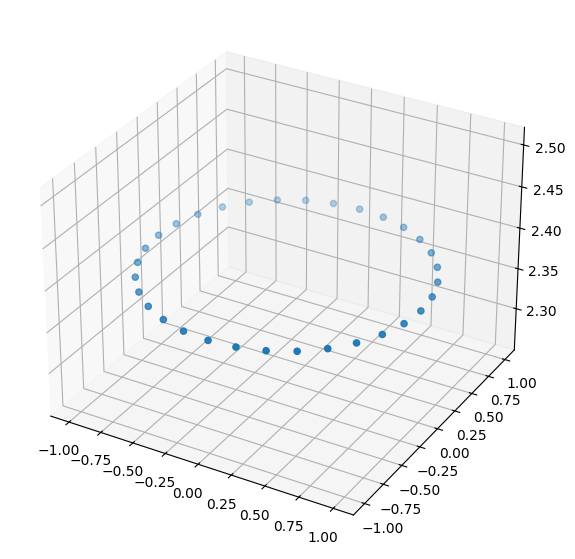

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Extract vertices positions
vertices = data.pos.cpu().numpy()

# Plot the vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2])

# Extract faces/triangles and plot each as a polygon
for i in range(data.face.shape[1]):
    triangle = vertices[data.face[:, i].long(), :]
    tri = plt.Polygon(
        triangle[:, :3],
        edgecolor="k",
        alpha=0.3,
        facecolor=np.random.rand(
            3,
        ),
    )
    ax.add_patch(tri)
    art3d.pathpatch_2d_to_3d(tri, z=0, zdir="z")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()